# Week_08_In-Class_Work

In [2]:
#the usual suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules for statistics
import math
import statistics
from scipy import stats

belize_path = "belize_airbnb_listings.csv"  
#df = pd.read_csv (r'Path where the CSV file is stored\File name.csv')

belize_df = pd.read_csv(belize_path)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


# 1. Lookup information on geometric mean and harmonic mean to answer the following questions:
    a. In a jupyter notebook create a markdown section for each of the three concepts:
        arithmetic mean, geometric mean, and harmonic mean
    b. Write a definition for arithmetic mean, geometric mean, and harmonic mean,
        under their respective headings
    c. Write a code example for arithmetic mean, geometric mean, and harmonic mean
        using the BelizeAirbnb data in a cell under the each respective summary in
        markdown

## ARITHMETIC MEAN:
*   __Definition:__ The average of a set of numbers, or a sum of the set divided by the count of numbers in the set.
*   Python Code:  __dataframe.mean()__

In [3]:
## Arithmetic mean

## Code Example: 
belize_df.mean()

id                                2.792490e+07
host_id                           1.240278e+08
latitude                          1.744829e+01
longitude                        -8.829203e+01
price                             3.571023e+02
minimum_nights                    2.263948e+00
number_of_reviews                 1.445351e+01
reviews_per_month                 5.380884e-01
calculated_host_listings_count    2.284835e+01
availability_365                  2.803155e+02
dtype: float64

## GEOMETRIC MEAN:
*   __Definition:__ average taken by multiplying the numbers of a set together and then taking the root of the numbers by the count of the number, example: take a square root (for two numbers), cube root (for three numbers) etc.
*   Python Code:  
            *  from scipy.stats.mstats import gmean
            *  gmean(dataframe['column name'])

In [4]:
## Geometric mean
## Code Example:

from scipy.stats.mstats import gmean

geometricMean = gmean(belize_df['price'])
print ('The Geometric Mean is: ' + str(geometricMean)) 

The Geometric Mean is: 234.7347175108817


In [5]:
## Geometric Mean
## Code Example without scypi gmean

multiply = 1
values = [8,16,22,12,41]
n = len(values)

for i in values:
    multiply = (multiply)*(i)

geometricMean = (multiply)**(1/n)
print ('The Geometric Mean is: ' + str(geometricMean)) 

The Geometric Mean is: 16.916852032061655


In [6]:
## Geometric Mean
## Belize AirBnB without scipi gmean <--- get OverflowError

multiply = 1
values = belize_df['price']
n = len(belize_df['price'])

for x in values:
    multiply = (multiply) * (x)

geometricMean = (multiply)**(1/n)
print('The Geometric Mean is: ' + str(geometricMean))



OverflowError: int too large to convert to float

## HARMONIC MEAN:
*   __Definition:__ Definition: the reciprocal of the average of the reciprocals
              EXAMPLE: 1, 2, 4, becomes 1/1, 1/2, 1/4 which is 1, 0.5, 0.25 = 1.75 then divide by the count of numbers
                       1.75/3, reciprocate it to 3/1.75 which becomes 1.714
                       1, 2, 4 = 1/1 + 1/2 + 1/4 = 1 + 0.5 + 0.25 = 1.75  1.75/3 -->
 *   Python Code:
         *  from scipy import stats
         *  statistics.harmonic_mean(dataframe['column'])


In [7]:
## Harmonic mean

## Code Example:

harmonicMean = statistics.harmonic_mean(belize_df['price'])
print ('The Harmonic Mean is: ' + str(harmonicMean)) 

The Harmonic Mean is: 170.9933850102646


#  2. Use this article to answer the following questions:
https://realpython.com/numpy-scipy-pandas-correlation-python/

    a. In a jupyter notebook markdown cell, describe the difference between linear and
        rank correlation.
    b. Create a scatter plot showing the relationship between
        calculated_host_listings_count and availability_365 in the Belize Airbnb data
    c. Calculate the correlation coefficient for the data in the scatter plot, and describe
        what is happening.

### a. In a jupyter notebook markdown cell, describe the difference between linear and rank correlation.
    
   __Linear correlation:__ measure of strength of a linear relationship between x and y (a straight line)
        *  has interval or ratio level - as the independent variable increases or decreases the function increases or decreases
        *  straight line
    
   __Rank correlation:__ normally measures oridinal values (such as small, medium, large)
        *  as the independent variable increases the function neither increases nor decreases in tandem
        *  wavey line or curved line

### b. Create a scatter plot showing the relationship between calculated_host_listings_count and availability_365 in the Belize Airbnb data

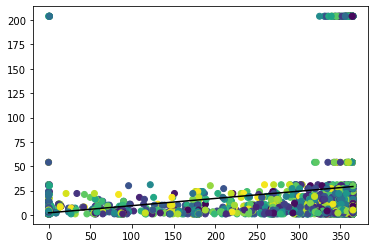

In [8]:
y = belize_df['calculated_host_listings_count']
x = belize_df['availability_365']
colors = np.random.rand(2796)

plt.scatter(x,y, c = colors)

# add the line of best fit we need to do the following
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='black')

###  c. Calculate the correlation coefficient for the data in the scatter plot, and describe what is happening.
 With a 0.17 there is barely a positive association between the amount of times that a host listed their B and B, and the availability of the property. In short, the association, though positive, is very small.

In [9]:
print(np.corrcoef(x,y))

[[1.         0.17275503]
 [0.17275503 1.        ]]
